In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
df2 = pd.read_csv('prediction.csv')
df2.head(2)

,0,1,2,3,4,5,6,7,8
0,8.243945,0.442707,814.191463,437.449497,0.820757,66.358208,9321.584760,1.0,5.0
1,0.450469,0.734878,690.536337,337.971868,0.163483,88.966042,9653.465215,2.0,3.0


In [60]:
df1 = pd.read_csv('dataset.csv')
df1.head()

,0,1,2,3,4,5,6,7,8,target
0,7.547600,0.151261,557.132466,354.008599,0.301029,55.282594,9635.211683,2.0,1.0,9461.469590
1,3.140491,0.794497,837.116189,104.515774,0.110622,88.516243,9425.041942,2.0,5.0,10257.271938
2,2.064447,0.236500,313.757354,259.127993,0.729964,88.350465,9115.661199,1.0,5.0,8719.214483
3,9.099262,0.453953,661.409826,466.070226,0.432750,21.516152,9584.310016,3.0,2.0,9165.197338
4,5.264564,0.683869,344.154511,485.441053,0.085599,90.308205,9193.271575,2.0,1.0,9458.427537


In [13]:
df1.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
target    0
dtype: int64

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       900 non-null    float64
 1   1       900 non-null    float64
 2   2       900 non-null    float64
 3   3       900 non-null    float64
 4   4       900 non-null    float64
 5   5       900 non-null    float64
 6   6       900 non-null    float64
 7   7       900 non-null    float64
 8   8       900 non-null    float64
 9   target  900 non-null    float64
dtypes: float64(10)
memory usage: 70.4 KB


In [15]:
df1.shape

(900, 10)

In [16]:
df2.shape

(100, 9)

In [40]:
corr = abs(df1.corr()['target']).sort_values()
corr

3         0.007499
5         0.017835
8         0.023457
0         0.037680
1         0.110671
6         0.316284
2         0.318919
7         0.463050
4         0.578062
target    1.000000
Name: target, dtype: float64

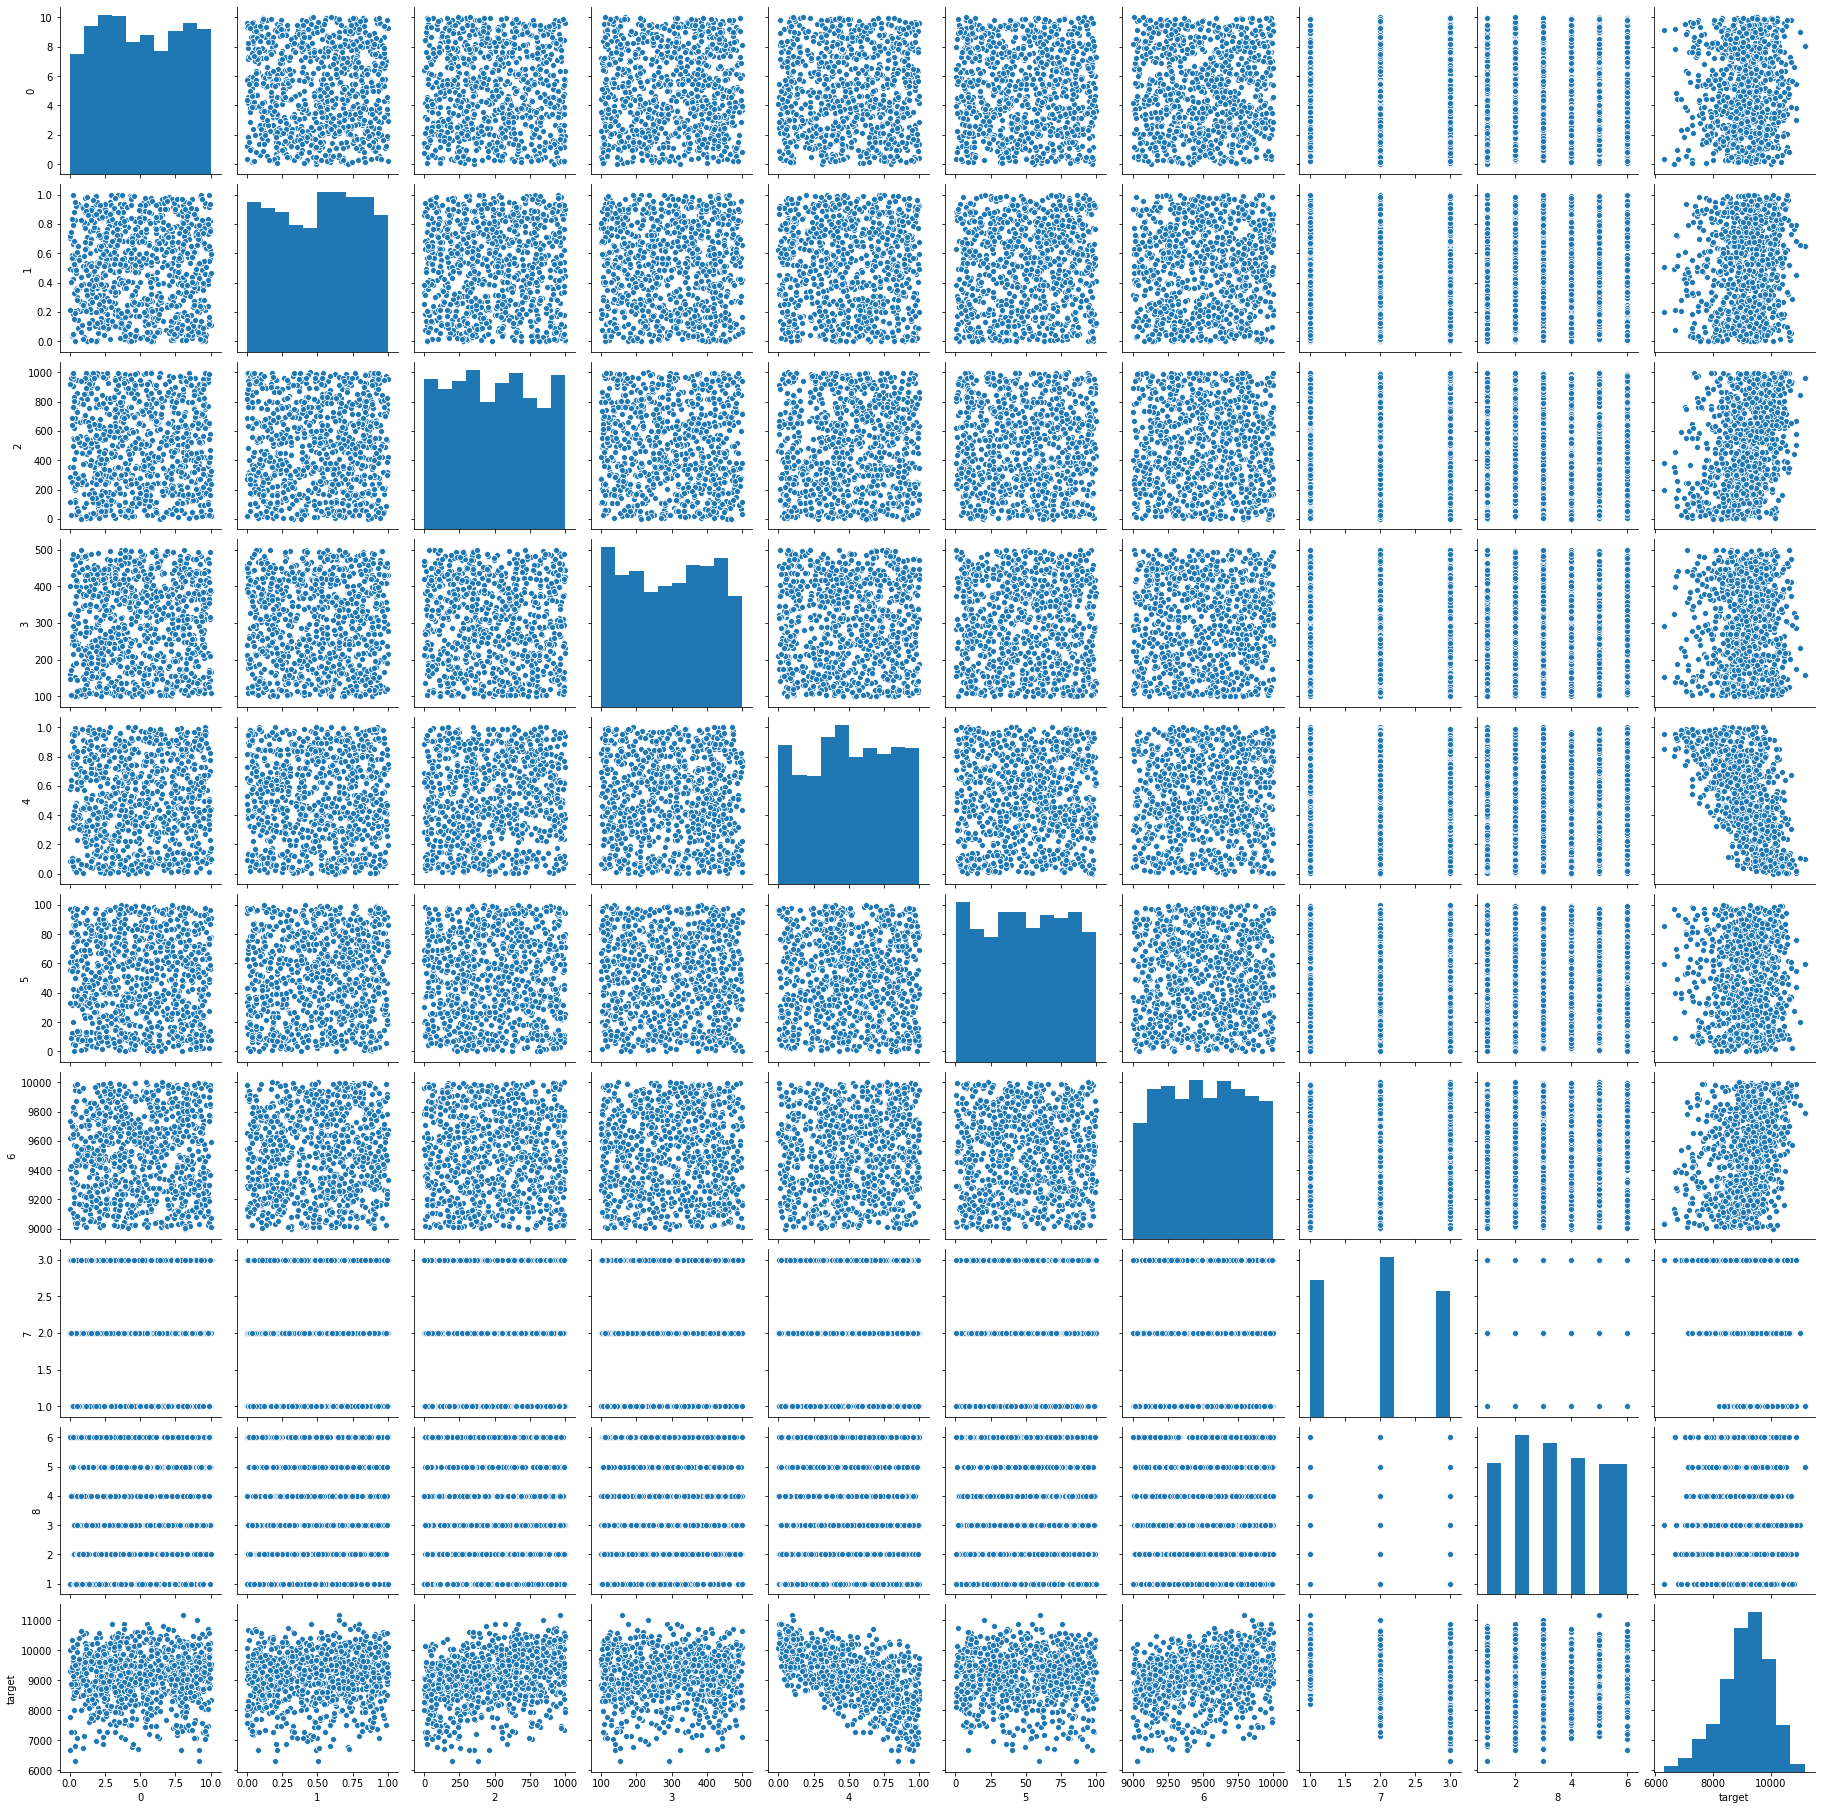

In [41]:
sns.pairplot(df1)

In [42]:
df1['7'].value_counts()

2.0    340
1.0    292
3.0    268
Name: 7, dtype: int64

In [43]:
df1['8'].value_counts()

2.0    171
3.0    162
4.0    146
1.0    141
6.0    140
5.0    140
Name: 8, dtype: int64

In [ ]:
#considering 7 and 8 variables are ordinal and keeping them as it is for prediction

In [61]:
x = df1.drop(columns=['target'])
y = df1['target']

In [78]:
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)

In [ ]:
#train test split method with the base models using KFold

In [79]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=30,random_state=0)

In [80]:
LR=LinearRegression()
m1=LR.fit(x,y)

ri = Ridge()
m2 = ri.fit(x,y)

l = Lasso()
m3 = l.fit(x,y)

en = ElasticNet()
m4 = en.fit(x,y)

In [81]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for model, name in zip([m1,m2,m3,m4],['Linear_Regression','Ridge','Lasso','ElasticNet']):
    rmse=[]
    for train_idx,test_idx in kf.split(x,y):
        Xtrain,Xtest=x.iloc[train_idx,:],x.iloc[test_idx,:]
        Ytrain,Ytest=y.iloc[train_idx],y.iloc[test_idx]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        mse=metrics.mean_squared_error(Ytest,Y_predict)
        rmse.append(np.sqrt(mse))
    print("RMSE score=%0.03f(+-%0.5f)[%s]"% (np.mean(rmse),np.std(rmse,ddof=1),name))
    print("r2 :",model.score(x,y))

RMSE score=358.263(+-4.89656)[Linear_Regression]
r2 : 0.8286132121947805
RMSE score=358.260(+-4.81110)[Ridge]
r2 : 0.8286262075380002
RMSE score=358.132(+-4.71935)[Lasso]
r2 : 0.8286152999053156
RMSE score=451.446(+-22.83858)[ElasticNet]
r2 : 0.7267912220322663


In [65]:
#cross validation method

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

In [71]:
LR = LinearRegression()
knn = KNeighborsRegressor() 
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
bag = BaggingRegressor(n_estimators=10)
adaboost = AdaBoostRegressor(n_estimators=50)
adaboost_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=50)
grad = GradientBoostingRegressor(n_estimators=100)

models = []
models.append(('Linear Regression',LR))
models.append(('KNN_new',knn))
models.append(('Decision Tree',DT))
models.append(('Random Forrest',RF))
models.append(('Bagged DT',bag))
models.append(('Ada Boost DT',adaboost))
models.append(('Ada boost Random Forrest',adaboost_rf))
models.append(('Gradient boosting',grad))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=7,shuffle=True,random_state=0)
    cv_results = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)' % (name,np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)))))

Linear Regression: 357.560591 (21.353371)
KNN_new: 843.733311 (30.029005)
Decision Tree: 482.652239 (26.997816)
Random Forrest: 333.008973 (14.022528)
Bagged DT: 348.671930 (10.443593)
Ada Boost DT: 367.849316 (21.006540)
Ada boost Random Forrest: 312.491553 (13.042167)
Gradient boosting: 313.369425 (12.989848)


In [ ]:
#if 7 and 8 are nominal then creating dummies for it

In [82]:
cols=['7','8']
df = pd.get_dummies(data=df1, columns=cols,drop_first=True)
df.head()

,0,1,2,3,4,5,6,target,7_2.0,7_3.0,8_2.0,8_3.0,8_4.0,8_5.0,8_6.0
0,7.547600,0.151261,557.132466,354.008599,0.301029,55.282594,9635.211683,9461.469590,1,0,0,0,0,0,0
1,3.140491,0.794497,837.116189,104.515774,0.110622,88.516243,9425.041942,10257.271938,1,0,0,0,0,1,0
2,2.064447,0.236500,313.757354,259.127993,0.729964,88.350465,9115.661199,8719.214483,0,0,0,0,0,1,0
3,9.099262,0.453953,661.409826,466.070226,0.432750,21.516152,9584.310016,9165.197338,0,1,1,0,0,0,0
4,5.264564,0.683869,344.154511,485.441053,0.085599,90.308205,9193.271575,9458.427537,1,0,0,0,0,0,0


In [83]:
x1 = df.drop(columns='target')
y1 = df['target']

In [84]:
sc=StandardScaler()
x1=sc.fit_transform(x1)
x1=pd.DataFrame(x1)

In [85]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=7,shuffle=True,random_state=0)
    cv_results = model_selection.cross_val_score(model,x1,y1,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)' % (name,np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)))))

Linear Regression: 358.618341 (21.762407)
KNN_new: 542.204488 (41.152191)
Decision Tree: 484.552916 (18.174157)
Random Forrest: 338.028469 (14.060421)
Bagged DT: 356.982183 (15.956758)
Ada Boost DT: 386.385650 (25.041606)
Ada boost Random Forrest: 317.407505 (10.565272)
Gradient boosting: 313.950840 (13.002011)


** We can see that creating dummies doesnt really improve the results by any cost.

In [115]:
knn = KNeighborsRegressor()
knn.fit(x,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [116]:
DT = DecisionTreeRegressor()
DT.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [117]:
RF = RandomForestRegressor()
RF.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [118]:
bag = BaggingRegressor(n_estimators=10)
bag.fit(x,y)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [121]:
adaboost = AdaBoostRegressor(n_estimators=50)
adaboost.fit(x,y)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [122]:
adaboost_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=50)
adaboost_rf.fit(x,y)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                    

In [123]:
grad = GradientBoostingRegressor(n_estimators=100)
grad.fit(x,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [124]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for model, name in zip([knn,DT,RF,bag,adaboost,adaboost_rf,grad],['knn','DT','RF','bagging dt','adaboost_dt','ad_rf','Gradientboost']):
    rmse=[]
    for train_idx,test_idx in kf.split(x,y):
        Xtrain,Xtest=x.iloc[train_idx,:],x.iloc[test_idx,:]
        Ytrain,Ytest=y.iloc[train_idx],y.iloc[test_idx]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        mse=metrics.mean_squared_error(Ytest,Y_predict)
        rmse.append(np.sqrt(mse))
    print("RMSE score=%0.03f(+-%0.5f)[%s]"% (np.mean(rmse),np.std(rmse,ddof=1),name))
    print("r2 :",model.score(x,y))

RMSE score=460.450(+-25.25131)[knn]
r2 : 0.8010700560684358
RMSE score=481.027(+-21.95603)[DT]
r2 : 0.9280543288081553
RMSE score=331.020(+-15.54434)[RF]
r2 : 0.9529089359829787
RMSE score=354.821(+-14.76759)[bagging dt]
r2 : 0.9401948123887018
RMSE score=367.533(+-22.18297)[adaboost_dt]
r2 : 0.8484076233137212
RMSE score=311.726(+-11.32980)[ad_rf]
r2 : 0.963536439443006
RMSE score=314.417(+-9.55542)[Gradientboost]
r2 : 0.9340815883809263


In [125]:
df2.head(2)

,0,1,2,3,4,5,6,7,8
0,8.243945,0.442707,814.191463,437.449497,0.820757,66.358208,9321.584760,1.0,5.0
1,0.450469,0.734878,690.536337,337.971868,0.163483,88.966042,9653.465215,2.0,3.0


In [126]:
sc=StandardScaler()
df2=sc.fit_transform(df2)
df2=pd.DataFrame(df2)

In [127]:
adaboost_rf.fit(x,y)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                    

In [128]:
y_predicted = adaboost_rf.predict(df2)

In [129]:
df2['y_predicted'] = pd.DataFrame(y_predicted)

In [130]:
df2.head()

,0,1,2,3,4,5,6,7,8,y_predicted
0,1.114656,-0.316061,0.948013,1.027295,1.209608,0.620981,-0.567493,-1.270213,0.953886,9483.083907
1,-1.731552,0.670148,0.546603,0.193369,-1.157275,1.415943,0.541297,-0.071899,-0.253565,9970.340880
2,0.224222,-0.417917,-0.962856,1.285877,-0.828877,-0.732957,1.166285,-0.071899,-0.253565,9578.130922
3,-0.389109,0.502806,-1.456972,-1.218282,1.238747,1.160164,-1.492190,-0.071899,0.953886,7692.417397
4,1.055756,-0.291519,0.013375,-0.056639,0.908485,-0.642705,1.420207,-1.270213,0.953886,9678.018461
